In [1]:
import GPy 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

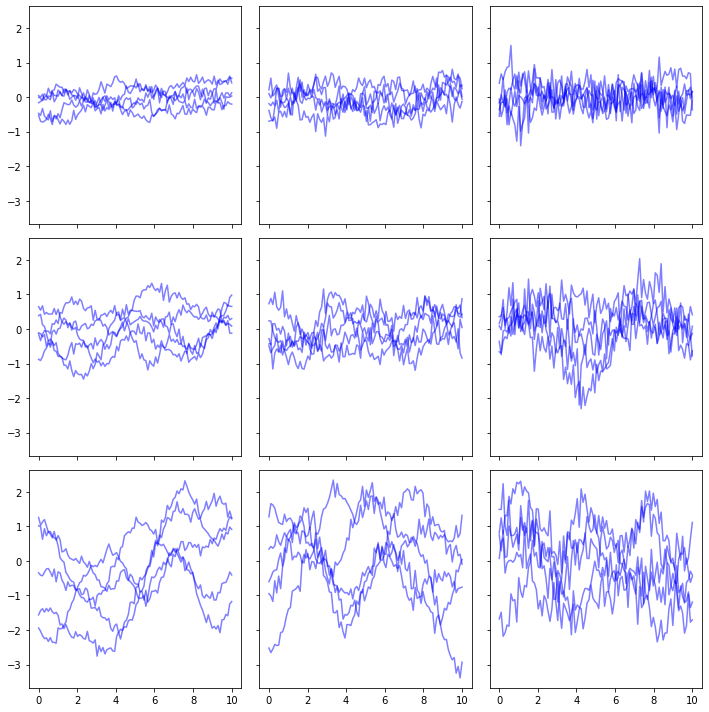

In [40]:

def plot_y(e, s, ax):
    X = np.linspace(0, 10, 100)[:, np.newaxis]
    k = GPy.kern.ExpQuad(input_dim=1, active_dims=[0]) # works on the first column of X, index=0
    for _ in range(5):
        y = np.random.multivariate_normal(np.zeros(X.shape[0]), e*k.K(X)+s*np.eye(X.shape[0]))
        ax.plot(X.flatten(), y, color='b', alpha=0.5)
    return ax

etas = 10.**np.linspace(-1, 0, 3)
sigmas = 10.**np.linspace(-2, -1, 3)
fig, axes = plt.subplots(len(etas), len(sigmas), sharex=True, sharey=True, figsize=(10, 10))
for i, eta in enumerate(etas):
    for j, sigma in enumerate(sigmas):
        ax = plot_y(eta, sigma, axes[i, j])
        
plt.tight_layout()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Multiplicative kernel with multiplicative data

In [ ]:
k_mult_mult = k1*k2

m_mult_mult = GPy.models.GPRegression(X, Y=z_mult[:, np.newaxis], kernel=k_mult_mult)
m_mult_mult.optimize_restarts(verbose=False)
plt.imshow(k_mult_mult.K(X))

In [ ]:
k_mult_mult_add = k1*k2 + k1 + k2

m_mult_mult_add = GPy.models.GPRegression(X, Y=z_add[:, np.newaxis], kernel=k_mult_mult_add)
m_mult_mult_add.optimize_restarts(verbose=False)
plt.imshow(k_mult_mult_add.K(X))

In [ ]:
m_mult_mult_add

Additive kernel with additive data

In [ ]:
k_add_add = k1 + k2

m_add_add = GPy.models.GPRegression(X, Y=z_add[:, np.newaxis], kernel=k_add_add)
m_add_add.optimize_restarts(verbose=False)
plt.imshow(k_add_add.K(X))

Additive kernel with multiplicative data

In [ ]:
k_add_mult = k1 + k2

m_add_mult = GPy.models.GPRegression(X, Y=z_mult[:, np.newaxis], kernel=k_add_mult)
m_add_mult.optimize_restarts(verbose=False)
plt.imshow(k_add_mult.K(X))

In [ ]:
def rmsd(m, Xnew=X):
    y_pred, _ = m.predict(Xnew)
    y_obs = m.Y
    return np.sqrt(np.sum((y_pred-y_obs)**2))

In [ ]:
print(rmsd(m_mult_mult)*100)
print(rmsd(m_mult_add)*100)
print(rmsd(m_add_mult)*100)
print(rmsd(m_add_add)*100)
print(rmsd(m_mult_mult_add)*100)

In [ ]:
m_mult_mult

In [ ]:
m_mult_add